Thus far, we have considered probability density and mass functions (PDFs and PMFs) of only one random variable. But, of course, often we measure multiple random variables $X_1, X_2, \ldots, X_n$ during a single event, meaning a measurement consists of determining values $x_1, x_2, \ldots,x_n$ of these random variables.

We can consider an $n$-tuple of continuous random variables to form a sample space $\Omega = \mathbb{R}^n$ on which a multivariate function $f:\mathbb{R}^n\rightarrow\mathbb{R}$, called the \keyword{joint PDF} assigns a probability density to each outcome $\bm{x}\in\mathbb{R}^n$.
The joint PDF must be greater than or equal to zero for all $\bm{x}\in\mathbb{R}^n$, the multiple integral over $\Omega$ must be unity, and the multiple integral over a subset of the sample space $A\subset \Omega$ is the probability of the event $A$.

We can consider an $n$-tuple of discrete random variables to form a sample space $\mathbb{N}_0^n$ on which a multivariate function $f:\mathbb{N}_0^n\rightarrow\mathbb{R}$, called the \keyword{joint PMF} assigns a probability to each outcome $\bm{x}\in \mathbb{N}_0^n$.
The joint PMF must be greater than or equal to zero for all $\bm{x}\in\mathbb{N}_0^n$, the multiple sum over $\Omega$ must be unity, and the multiple sum over a subset of the sample space $A\subset \Omega$ is the probability of the event $A$.

Let's visualize this by plotting a bivariate Gaussian using *Matlab*'s `mvnpdf` function.
The result is \autoref{fig:joint_probability_pdf}.
Note how the means and standard deviations affect the distribution.

In [69]:
clear; close all;
save_figures = true; % save flag

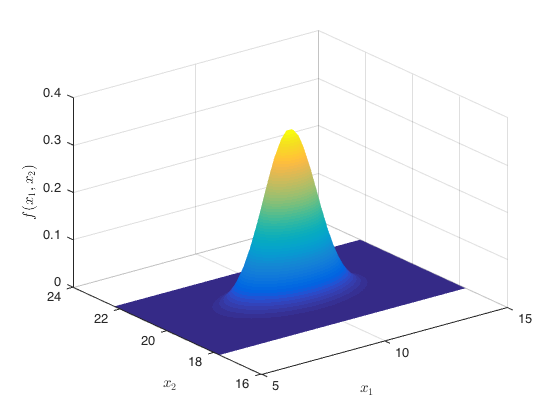

In [25]:
mu = [10,20]; % means
Sigma = [1,0;0,.2]; % cov ... we'll talk about this
x1_a = linspace(...
    mu(1)-5*sqrt(Sigma(1,1)),...
    mu(1)+5*sqrt(Sigma(1,1)),...
    50);
x2_a = linspace(...
    mu(2)-5*sqrt(Sigma(2,2)),...
    mu(2)+5*sqrt(Sigma(2,2)),...
    50);
[X1,X2] = meshgrid(x1_a,x2_a);
f = mvnpdf([X1(:) X2(:)],mu,Sigma);
f = reshape(f,length(x2_a),length(x1_a));

h = figure;
p = surf(x1_a,x2_a,f);
xlabel('$x_1$','interpreter','latex')
ylabel('$x_2$','interpreter','latex')
zlabel('$f(x_1,x_2)$','interpreter','latex')
shading interp
hgsave(h,'figures/temp');

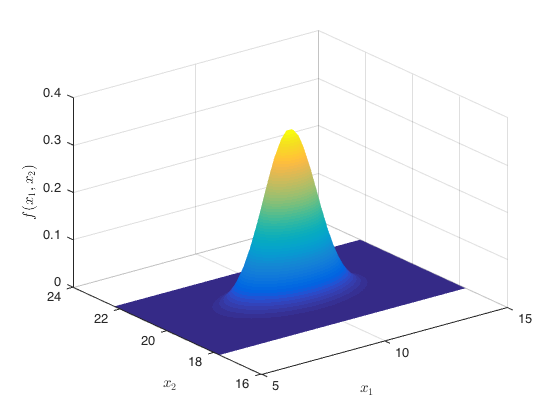

In [26]:
if save_figures
    fn = 'joint_probability_pdf.tex';
    h = hgload('figures/temp');
    cleanfigure;
    matlab2tikz(['figures/',fn],...
        'figurehandle',h,...
        'width','.7\linewidth',...
        'height','.4\linewidth',...
        'extraAxisOptions',...
        [...
            'scaled ticks=false,',... 
            'tick label style={/pgf/number format/fixed}'...
        ],...
        'showInfo', false...
    );
end

## Marginal probability

The \keyword{marginal PDF} of a multivariate PDF is the PDF of some subspace of $\Omega$ after one or more variables have been "integrated out," such that a fewer number of random variables remain.
Of course, these marginal PDFs must have the same properties of any PDF, such as integrating to unity.

Let's demonstrate this by numerically integrating over $x_2$ in the bivariate Gaussian, above.

In [27]:
f1 = trapz(x2_a,f',2); % trapezoidal integration

Plotting this yields \autoref{fig:joint_probability_marginal}.

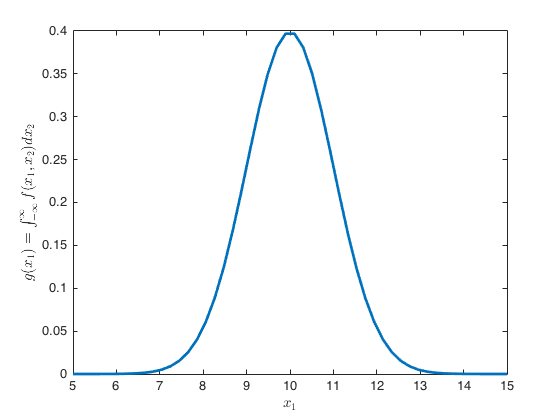

In [28]:
h = figure;
p = plot(x1_a,f1);
p.LineWidth = 2;
xlabel('$x_1$','interpreter','latex')
ylabel('$g(x_1) = \int_{-\infty}^\infty f(x_1,x_2) d x_2$','interpreter','latex')
hgsave(h,'figures/temp');

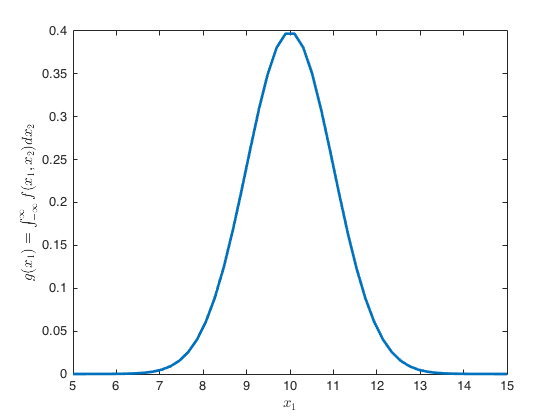

In [29]:
if save_figures
    fn = 'joint_probability_marginal.tex';
    h = hgload('figures/temp');
    cleanfigure;
    matlab2tikz(['figures/',fn],...
        'figurehandle',h,...
        'width','.7\linewidth',...
        'height','.4\linewidth',...
        'extraAxisOptions',...
        [...
            'scaled ticks=false,',... 
            'tick label style={/pgf/number format/fixed}'...
        ],...
        'showInfo', false...
    );
end

We should probably verify that this integrates to one.

In [30]:
disp(['integral over x_1 = ',sprintf('%0.7f',trapz(x1_a,f1))])

integral over x_1 = 0.9999988


Not bad.

## Covariance

Very often, especially in \keyword{machine learning} or \keyword{artificial intelligence} applications, the question about two random variables $X$ and $Y$ is: how do they co-vary?
That is what is their \keyword{covariance}, defined as
\maybeeq{
\begin{align*}
    \textrm{cov}(X,Y) &\equiv E\left((X - \mu_X) (Y - \mu_Y)\right) \\
    &= E(X Y) - \mu_X \mu_Y.
\end{align*}
}
Note that when $X = Y$, the covariance is just the variance.
When a covariance is large and positive, it is an indication that the random variables are *strongly correlated*.
When it is large and negative, they are *strongly anti-correlated*.
Zero covariance means the variables are *uncorrelated*.
In fact, \keyword{correlation} is defined as
\maybeeq{
\begin{align*}
    \textrm{cor}(X,Y) = \frac{\textrm{cov}(X,Y)}{\sqrt{\textrm{var}(X)\textrm{var}(Y)}}.
\end{align*}
}
This is essentially the covariance "normalized" to the interval $[-1,1]$.

### Sample covariance

As with the other statistics we've considered, covariance can be estimated from measurement.
The estimate, called the \keyword{sample covariance} $q_{XY}$, of random variables $X$ and $Y$ with sample size $N$ is given by
\maybeeq{
\begin{align*}
    q_{XY} &= \frac{1}{N-1} \sum_{i=1}^N (x_i - \overline{X})(y_i - \overline{Y}).
\end{align*}
}

### Multivariate covariance

With $n$ random variables $X_i$, one can compute the covariance of each pair.
It is common practice to define an $n\times n$ matrix of covariances called the \keyword{covariance matrix} $\Sigma$ such that each pair's covariance
\begin{align}
    \textrm{cov}(X_i,X_j)
\end{align}
appears in its row-column combination (making it symmetric), as shown below.
\maybeeq{
\begin{align*}
    \Sigma = 
    \begin{bmatrix}
        \textrm{cov}(X_1,X_1) & \textrm{cov}(X_1,X_2) & \cdots & \textrm{cov}(X_1,X_n) \\
        \textrm{cov}(X_2,X_1) & \textrm{cov}(X_2,X_2) &   & \textrm{cov}(X_2,X_n) \\
        \vdots &  & \ddots & \vdots \\
        \textrm{cov}(X_n,X_1) & \textrm{cov}(X_n,X_2) & \cdots & \textrm{cov}(X_n,X_n)
    \end{bmatrix}
\end{align*}
}

The multivariate \keyword{sample covariance matrix} $Q$ is the same as above, but with sample covariances $q_{X_i X_j}$.

Both covariance matrices have correlation analogs.

### Example: car data

Let's use a built-in multivariate data set that describes different features of cars, listed below.

In [1]:
d = load('carsmall.mat') % this is a "struct"


d = 

           Model: [100x33 char]
          Origin: [100x7 char]
             MPG: [100x1 double]
       Cylinders: [100x1 double]
    Displacement: [100x1 double]
      Horsepower: [100x1 double]
          Weight: [100x1 double]
    Acceleration: [100x1 double]
      Model_Year: [100x1 double]
             Mfg: [100x13 char]



Let's compute the sample covariance and correlation matrices. 

In [2]:
variables = {...
    'MPG','Cylinders',...
    'Displacement','Horsepower',...
    'Weight','Acceleration',...
    'Model_Year'};
n = length(variables);
m = length(d.MPG);

data = NaN*ones(m,n); % preallocate
for i = 1:n
    data(:,i) = d.(variables{i});
end

cov_d = nancov(data); % sample covariance
cor_d = corrcov(cov_d) % sample correlation


cor_d =

    1.0000   -0.8367   -0.8048   -0.8028   -0.8591    0.4631    0.7112
   -0.8367    1.0000    0.9486    0.8588    0.8886   -0.6052   -0.5844
   -0.8048    0.9486    1.0000    0.9102    0.8860   -0.6719   -0.5557
   -0.8028    0.8588    0.9102    1.0000    0.8656   -0.6836   -0.5843
   -0.8591    0.8886    0.8860    0.8656    1.0000   -0.4642   -0.4673
    0.4631   -0.6052   -0.6719   -0.6836   -0.4642    1.0000    0.4404
    0.7112   -0.5844   -0.5557   -0.5843   -0.4673    0.4404    1.0000



This is highly correlated/anticorrelated data!
Let's plot each variable versus each other variable to see the correlations of each.
We use a red-to-blue colormap to contrast anticorrelation and correlation.
Purple, then, is uncorrelated.

The following builds the red-to-blue colormap.

In [3]:
n_colors = 10;
cmap_rb = NaN*ones(n_colors,3);
for i = 1:n_colors
    a = i/n_colors;
    cmap_rb(i,:) = (1-a)*[1,0,0]+a*[0,0,1];
end

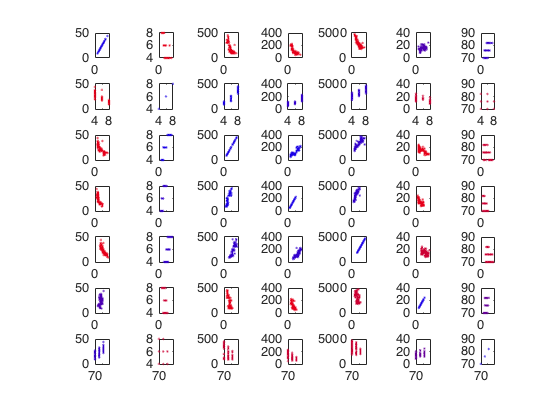

In [4]:
h = figure;
for i = 1:n
    for j = 1:n
        subplot(n,n,sub2ind([n,n],j,i))
        p = plot(d.(variables{i}),d.(variables{j}),'.'); hold on
        this_color = cmap_rb(round((cor_d(i,j)+1)*(n_colors-1)/2),:);
        p.MarkerFaceColor = this_color;
        p.MarkerEdgeColor = this_color;
    end
end
hgsave(h,'figures/temp');

In [ ]:
if save_figures
    fn = 'joint_probability_cov.tex';
    h = hgload('figures/temp');
    cleanfigure;
    matlab2tikz(['figures/',fn],...
        'figurehandle',h,...
        'width','1\linewidth',...
        'height','1\linewidth',...
        'extraAxisOptions',...
        [...
            'ticks=none'...
        ],...
        'showInfo', false...
    );
end

## Conditional probability and dependence

*Independent variables are uncorrelated*.
However, *uncorrelated variables may or may not be independent*.
Therefore, we cannot use correlation alone as a test for independence.
For instance, for random variables $X$ and $Y$, where $X$ has some even distribution and $Y = X^2$, clearly the variables are *dependent*.
However, the are also *uncorrelated* (due to symmetry).

Using a uniform distribution $U(-1,1)$, let's show this with some sampling.
We compute the correlation for different sample sizes.

In [70]:
N_a = round(linspace(10,500,100));
qc_a = NaN*ones(size(N_a));
rng(6)
x_a = -1 + 2.*rand(max(N_a),1);
y_a = x_a.^2;
for i = 1:length(N_a) 
    % should write incremental algorithm
    % but lazy
    q = cov(x_a(1:N_a(i)),y_a(1:N_a(i)));
    qc = corrcov(q);
    qc_a(i) = qc(2,1); % "cross" correlation
end

The absolute values of the correlations are shown in \autoref{fig:joint_probability_cor_squared}.
Note that we should probably average several such curves to estimate how the correlation would drop off with $N$, but the single curve describes our understanding that the correlation, in fact, approaches zero in the large-sample limit.

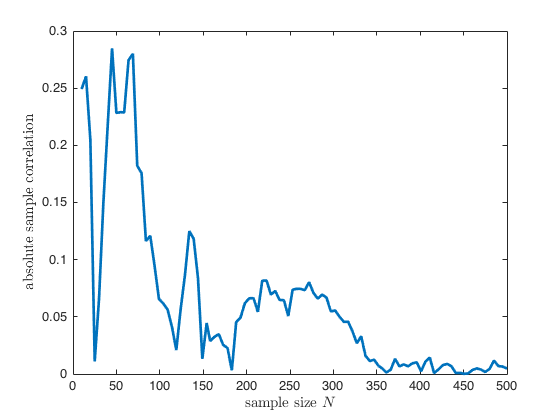

In [77]:
h = figure;
p = plot(N_a,abs(qc_a));
p.LineWidth = 2;
xlabel('sample size $N$','interpreter','latex')
ylabel('absolute sample correlation','interpreter','latex')
hgsave(h,'figures/temp');

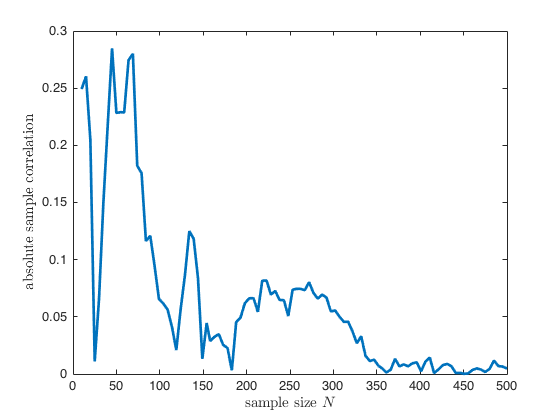

In [78]:
if save_figures
    fn = 'joint_probability_cor_squared.tex';
    h = hgload('figures/temp');
    cleanfigure;
    matlab2tikz(['figures/',fn],...
        'figurehandle',h,...
        'width','.9\linewidth',...
        'height','.33\linewidth',...
        'extraAxisOptions',...
        [...
            'scaled ticks=false,',... 
            'tick label style={/pgf/number format/fixed}'...
        ],...
        'showInfo', false...
    );
end